# Graph Theory and Network Composition

## Analyzing Networks

In [77]:
# imports

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Create graph

G = nx.Graph()

In [3]:
# create example

G.add_node(1)
G.add_nodes_from([2, 3])

G.add_edge(1, 2)
G.add_edges_from([(1, 2), (1, 3)])

In [4]:
# analizando el grafo

G.order()

3

In [5]:
G.number_of_nodes()

3

In [6]:
G.size()

2

In [7]:
G.number_of_edges()

2

In [8]:
# Average degree

sum(dict(G.degree()).values())/G.order()

1.3333333333333333

In [9]:
nx.density(G)

0.6666666666666666

In [10]:
nx.diameter(G)

2

In [11]:
nx.average_shortest_path_length(G)

1.3333333333333333

### Node Centrality Metrics

In [12]:
betweenness = nx.betweenness_centrality(G, weight='edge')
closeness = nx.closeness_centrality(G, distance='edge')
eigenvector = nx.eigenvector_centrality_numpy(G)
degree = nx.degree_centrality(G)
pagerank = nx.pagerank(G)

In [13]:
betweenness

{1: 1.0, 2: 0.0, 3: 0.0}

In [14]:
closeness

{1: 1.0, 2: 0.6666666666666666, 3: 0.6666666666666666}

In [15]:
nx.is_connected(G)

True

## Building and Analyzing Graphs from Tabular Data

In [16]:
# imports and create dataframe

import pandas as pd

gymnastics = pd.read_csv('data/us_womens_gymnastics.csv')
gymnastics.head()

,Name_x,Name_y,Games,Event
0,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Marian Emma Barone (Twining-),1948 Summer,Gymnastics Women's Team All-Around
1,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)","Consetta Anne ""Connie"" Caruccio-Lenz",1948 Summer,Gymnastics Women's Team All-Around
2,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Dorothy Katherine Dalton,1948 Summer,Gymnastics Women's Team All-Around
3,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Meta Elste (Neumann-),1948 Summer,Gymnastics Women's Team All-Around
4,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Helen Mary Schifano (-Sjursen),1948 Summer,Gymnastics Women's Team All-Around


In [17]:
gymnastics.shape

(2866, 4)

### Rows Represent Transactions or Interactions

In [18]:
df = gymnastics
source, target = 'Name_x', 'Name_y'

G = nx.from_pandas_edgelist(df, source, target)

* How many gymnasts (nodes) are in the graph?
* How many edges are in the graph?
* What is the average degree?
* What is the density of the graph?
* Is this graph fully-connected? How do you know?
* What gymnast has the highest betweenness centrality?
* What gymnast has the highest Eigenvector centrality?
* What gymnast has the highest degree centrality?


In [19]:
# How many gymnasts (nodes) are in the graph?

G.number_of_nodes()

94

In [20]:
# How many edges are in the graph?

G.number_of_edges()

292

In [21]:
# What is the average degree?

sum(dict(G.degree()).values())/G.order()

6.212765957446808

In [22]:
# What is the density of the graph?

nx.density(G)

0.06680393502630977

In [23]:
# Is this graph fully-connected? How do you know?

nx.is_connected(G)

False

In [24]:
# What gymnast has the highest betweenness centrality?

# Compute the shortest-path betweenness centrality for nodes. 
# Betweenness centrality of a node v is the sum of the fraction of all-pairs 
# shortest paths that pass through v

betweenness = nx.betweenness_centrality(G, weight='edge')

# bet_cent_sorted = sorted(bet_cent.items(), key=lambda x: x[1], reverse=True)
betweenness_sorted = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)
betweenness_sorted[0]

('Linda Joan Metheny (-Mulvihill)', 0.05002337540906966)

In [25]:
# What gymnast has the highest Eigenvector centrality?

# Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors


eigenvector = nx.eigenvector_centrality_numpy(G)
eigenvector_sorted = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)
eigenvector_sorted[0]

('Clara Marie Schroth-Lomady', 0.330625940301217)

In [26]:
# What gymnast has the highest degree centrality?

# The degree centrality for a node v is the fraction of nodes it is connected to.


degree = nx.degree_centrality(G)
degree_sorted = sorted(degree.items(), key=lambda x: x[1], reverse=True)
degree_sorted[0]

('Consetta Anne "Connie" Caruccio-Lenz', 0.15053763440860216)

### Rows Represent Entities

In [27]:
# Cargamos datos

basketball = pd.read_csv('data/us_mens_basketball.csv')
basketball.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
2,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
3,3874,"William Lloyd ""Willie"" Anderson, Jr.",M,21.0,200.0,86.0,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Bronze
4,4505,Carmelo Kyan Anthony,M,20.0,203.0,109.0,United States,USA,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


In [28]:
# se pueden relacionar por Games para ver los jugadores de los mismos equipos en cada
# olimpiada

In [29]:
# Genera un dataframe tal que las dos primeras columnas son jugadores
# y la tercera son las olimpiadas que han jugado en común

def df_to_graph(df, entity, edge):
    df2 = df.copy()
    graph_df = pd.merge(df, df2, how='inner', on=edge)
    graph_df = graph_df.groupby([entity + '_x', entity + '_y']).count().reset_index()
    graph_df = graph_df[graph_df[entity + '_x'] != graph_df[entity + '_y']]
    
    if type(edge) == list:
        graph_df = graph_df[[entity + '_x', entity + '_y'] + edge]
    else:
        graph_df = graph_df[[entity + '_x', entity + '_y', edge]]
    
    return graph_df

In [30]:
# modificamos el df para adecuarlo a nuestro sistema

basketball2 = df_to_graph(basketball, entity='Name', edge='Games')
basketball2.columns

Index(['Name_x', 'Name_y', 'Games'], dtype='object')

In [31]:
G = nx.from_pandas_edgelist(basketball2, 
                            source='Name_x', 
                            target='Name_y', 
                            edge_attr='Games')


* How many basketball players (nodes) are in the graph?
* How many edges are in the graph?
* What is the average degree?
* What is the density of the graph?
* Is this graph fully-connected? How do you know?
* What player has the highest betweenness centrality?
* What player has the highest Eigenvector centrality?
* What player has the highest degree centrality?
* What are some notable differences between this graph and the gymnastics graph you analyzed earlier?


In [32]:
# How many basketball players (nodes) are in the graph?

G.number_of_nodes(), len(basketball.Name.unique())

(196, 196)

In [33]:
# How many edges are in the graph?

G.number_of_edges()

1232

In [34]:
# What is the average degree?

sum(dict(G.degree()).values())/G.order()

12.571428571428571

In [35]:
# What is the density of the graph?

nx.density(G)

0.06446886446886448

In [36]:
# Is this graph fully-connected? How do you know?

nx.is_connected(G)

False

In [37]:
# What player has the highest betweenness centrality?

betweenness = nx.betweenness_centrality(G, weight='edge')
betweenness_sorted = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)
betweenness_sorted[0]

('Gary Dwayne Payton', 0.09193761564895586)

In [38]:
# What player has the highest Eigenvector centrality?

eigenvector = nx.eigenvector_centrality_numpy(G)
eigenvector_sorted = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)
eigenvector_sorted[0]

('Carmelo Kyan Anthony', 0.34185005667190743)

In [39]:
# What player has the highest degree centrality?

degree = nx.degree_centrality(G)
degree_sorted = sorted(degree.items(), key=lambda x: x[1], reverse=True)
degree_sorted[0]

('Carmelo Kyan Anthony', 0.18461538461538463)

In [40]:
# What are some notable differences between this graph and the gymnastics 
# graph you analyzed earlier?

# TO DO

## Visualization of Network Data

https://networkx.github.io/documentation/stable/reference/drawing.html

/home/alberto/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


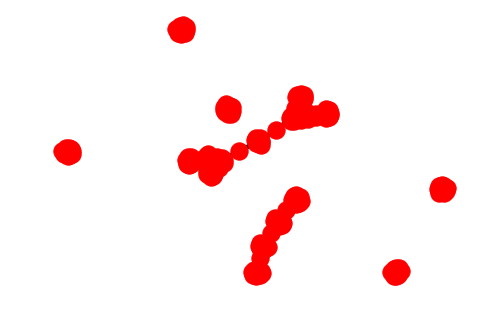

In [41]:
# visualización del nodo

nx.draw(G)

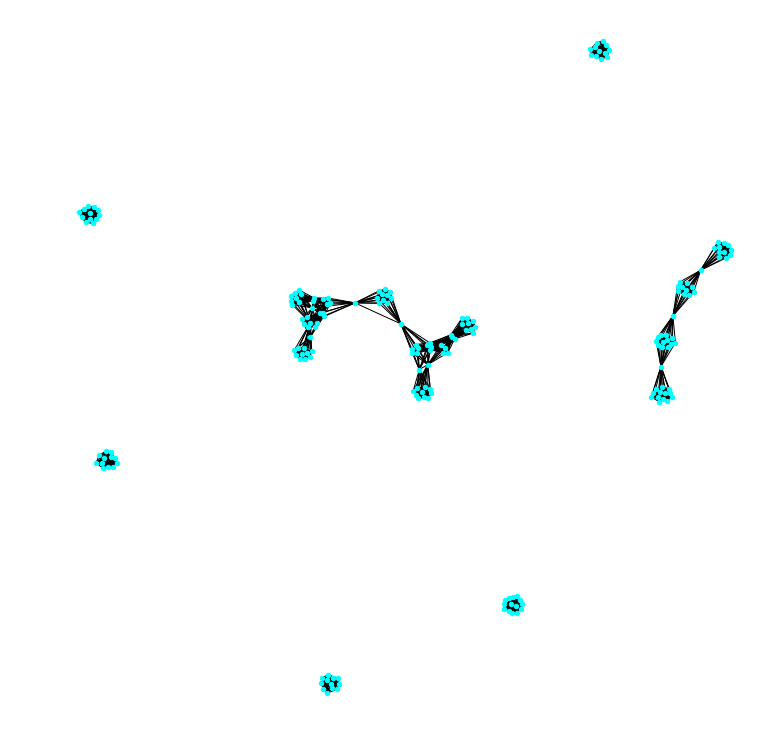

In [42]:
plt.figure(figsize=(10,10))
nx.draw(G, node_size=20, node_color='cyan')

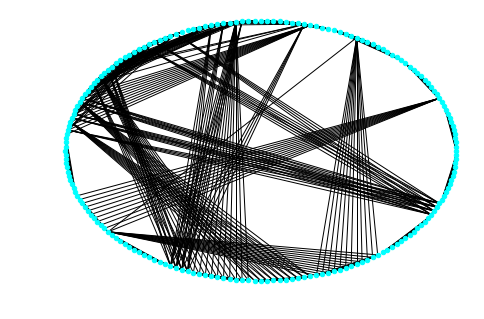

In [43]:
nx.draw_circular(G, node_size=20, node_color='cyan')

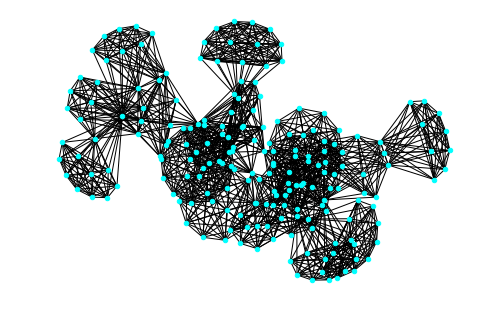

In [44]:
nx.draw_kamada_kawai(G, node_size=20, node_color='cyan', with_labels=False)

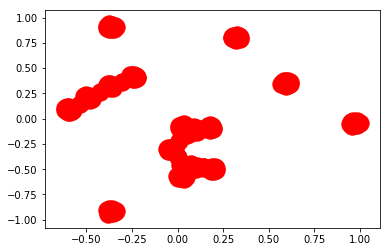

In [45]:
nx.draw_networkx(G, pos=None, arrows=False, arrowsize=1, with_labels=False)

### Bar Charts

In [46]:
G

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6533d1f2e8>]],
      dtype=object)

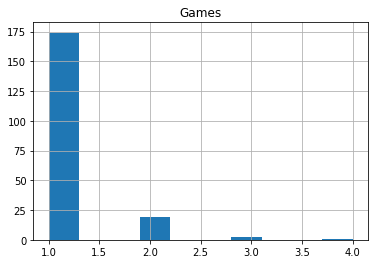

In [81]:
basketball.head()

# entity='Name'
basketball.groupby('Name').agg({'Games': np.unique}).head(20)
basket_group = basketball[['Name', 'Games']].groupby('Name').agg(np.size).sort_values(by='Games', ascending=False)
basket_group.hist()

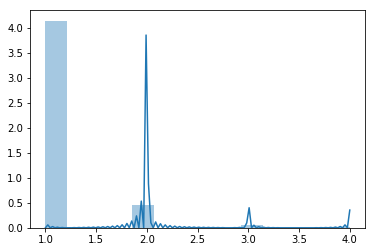

In [82]:
sns.distplot(basket_group)

### Scatter Plots